# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [22]:
import pandas as pd
import zipfile 
import glob
import os
import numpy as np
import pandas as pd
import urllib
import requests
import os
import io
import pylab as plt
import collections 
import geopandas as gpd
from fiona.crs import from_epsg
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist, pdist
#zf = zipfile.ZipFile(fname)
#df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

In [23]:
allfilezip = glob.glob("*.zip")
allfilezip

['zbp11totals.zip',
 'zbp08totals.zip',
 'zbp06totals.zip',
 'zbp99totals.zip',
 'zbp13totals.zip',
 'zbp03totals.zip',
 'zbp14totals.zip',
 'zbp04totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp98totals.zip',
 'zbp94totals.zip',
 'zbp10totals.zip',
 'zbp02totals.zip',
 'zbp12totals.zip',
 'zbp07totals.zip',
 'zbp01totals.zip',
 'zbp09totals.zip',
 'zbp00totals.zip',
 'ZIP_CODE_040114.zip',
 'zbp97totals.zip',
 'zbp05totals.zip']

In [24]:
for i in allfilezip:
    os.system('mv ' + i + ' $PUIDATA')

In [25]:
#get all unzipped data file names
os.chdir(os.getenv('PUIDATA'))
allfile = glob.glob("zbp*.zip")
allfile

['zbp11totals.zip',
 'zbp08totals.zip',
 'zbp06totals.zip',
 'zbp99totals.zip',
 'zbp13totals.zip',
 'zbp03totals.zip',
 'zbp14totals.zip',
 'zbp04totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp98totals.zip',
 'zbp94totals.zip',
 'zbp10totals.zip',
 'zbp02totals.zip',
 'zbp12totals.zip',
 'zbp07totals.zip',
 'zbp01totals.zip',
 'zbp09totals.zip',
 'zbp00totals.zip',
 'zbp97totals.zip',
 'zbp05totals.zip']

In [26]:
cbb = pd.DataFrame()

In [27]:
for i in range(94,100):
    fname='zbp' + str(i) + 'totals.zip'
    time = 1900 + i
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt'))).assign(year=time)
    df.columns = [x.upper() for x in df.columns]
    df = df[['ZIP', 'EST', 'YEAR']]
    cbb = cbb.append(df)
    

for i in range(0,15):
    fname='zbp' + str(i).zfill(2) + 'totals.zip'
    time = 2000 + i
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt'))).assign(year=time)
    df.columns = [x.upper() for x in df.columns]
    df = df[['ZIP', 'EST', 'YEAR']]
    cbb = cbb.append(df)
    
cbb.shape

(828791, 3)

In [28]:
cbb.rename(columns={"ZIP":"ZIPCODE"}, inplace=True)
cbb.head()

,ZIPCODE,EST,YEAR
0,1001,439,1994
1,1002,450,1994
2,1003,10,1994
3,1004,47,1994
4,1005,92,1994


In [29]:
#url = "https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip"
#urllib.request.urlretrieve(url, "file.gz")
#!unzip -d $PUIDATA file.gz

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [30]:
import geopandas as gpd
nyczipsshp = gpd.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
nyczipsshp['ZIPCODE']=nyczipsshp['ZIPCODE'].values.astype(int)
nyczipsshp = nyczipsshp[['ZIPCODE','geometry']]
#nyczipsshp.dropna(inplace=True)
#nyczipsshp.plot()
#nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [31]:
type(nyczipsshp.ZIPCODE[2])

numpy.int64

In [32]:
cbb = pd.pivot_table(cbb, values='EST', index='ZIPCODE', columns='YEAR' )
#cbb.dropna(axis=0, inplace=True)
cbb.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
501,NaN,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,7.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,505.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,586.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,16.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0


In [33]:
# 20 years of data and 263 zipcodes
cbs = nyczipsshp.merge(cbb,right_index=True, left_on="ZIPCODE")
cbs.drop('geometry',axis=1, inplace=True)
cbs.set_index('ZIPCODE',inplace=True)
cbs.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [34]:
cbs.shape

(260, 21)

In [35]:
#cleaning all missing values
cbs.dropna(axis=0,inplace=True)
cbs.shape

(243, 21)

In [36]:
#then the standardization will look like:
vals = ((cbs.T - cbs.mean(axis=1)) / cbs.std(axis=1)).T
vals.shape

(243, 21)

In [37]:
vals.mean(axis=1).shape

(243,)

In [41]:
vals.std(axis=1).shape

(243,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

## Scenario 1: Using elbow to find optimal k

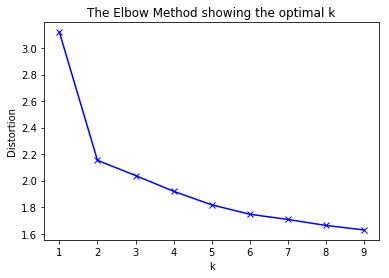

In [43]:
# elbow
# k means determine k
X = vals

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Figure: When the value is 2, a twist occurs.So k = 2**

In [56]:
# Code from Applied Data Science class session 8 by Prof. Stanislav Sobolevsky
# Average silhouette score
# Support by Estella
range_n_clusters = range(2,11)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=444)
    cluster_labels = clusterer.fit_predict(vals)
    silhouette_avg = silhouette_score(vals, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(vals, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.576214650703
For n_clusters = 3 The average silhouette_score is : 0.543676795688
For n_clusters = 4 The average silhouette_score is : 0.497431006615
For n_clusters = 5 The average silhouette_score is : 0.250689433722
For n_clusters = 6 The average silhouette_score is : 0.321615490601
For n_clusters = 7 The average silhouette_score is : 0.255415215329
For n_clusters = 8 The average silhouette_score is : 0.244041664746
For n_clusters = 9 The average silhouette_score is : 0.231024442727
For n_clusters = 10 The average silhouette_score is : 0.141533951459


** The number of 2 clusters is maximum, so k=2.**

In [45]:
#cluster with kmeans
km2 = KMeans(n_clusters=2, random_state=444).fit(vals)
#km_res = km.fit(vals)
vals['KM2'] = km2.fit(vals).labels_

In [46]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km2.labels_.shape

(243,)

In [47]:
shp2 = nyczipsshp.merge(vals, left_on='ZIPCODE', right_index=True)
shp2.head()

,ZIPCODE,geometry,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,KM2
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,...,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853,0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,...,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875,0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,...,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464,0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,...,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007,0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,...,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331,0


### The map of the clusters may look something like this##


** k is the same for 2 algorithms, so the codes and plots are same. **

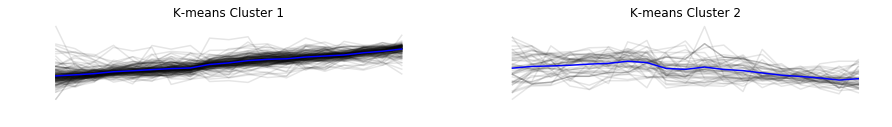

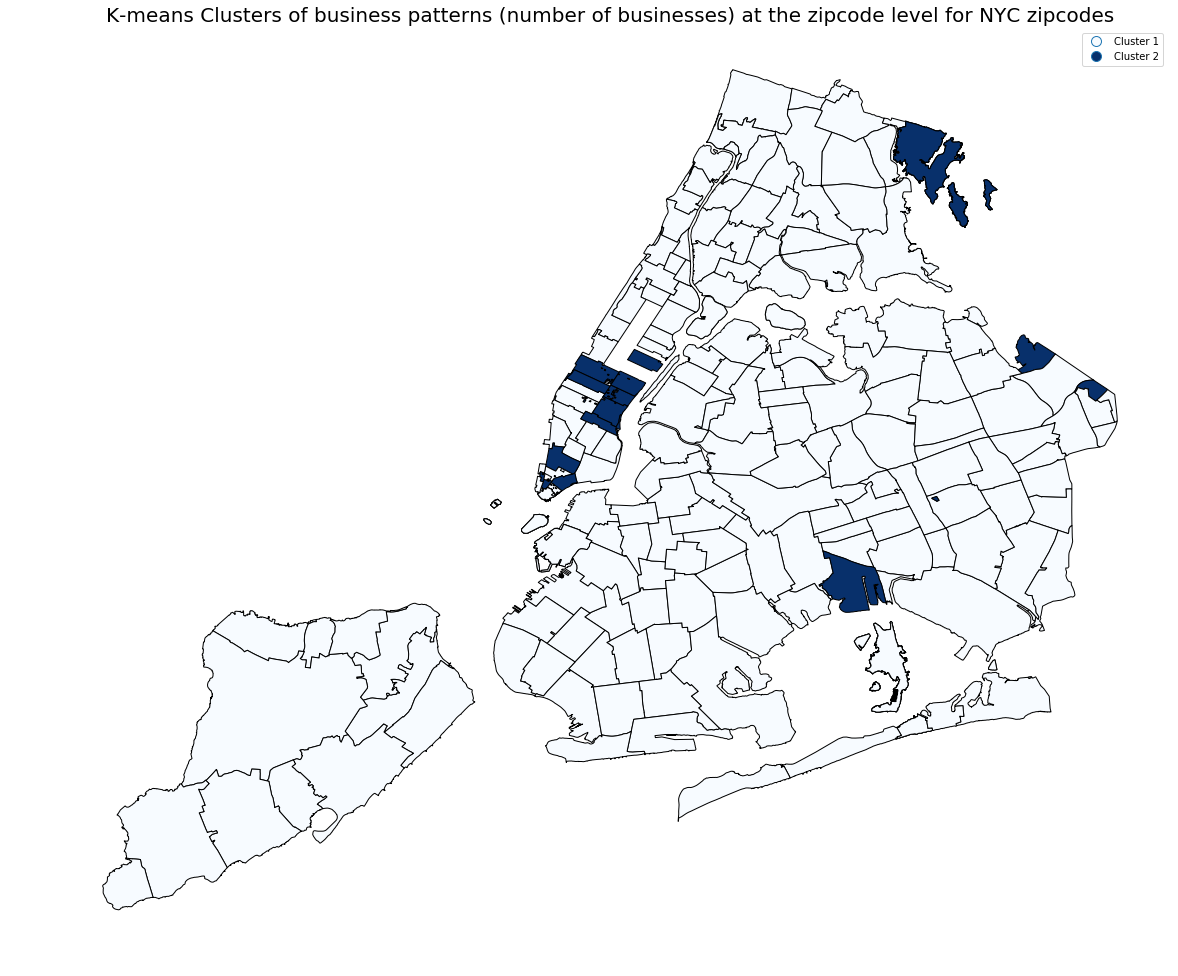

In [57]:
fig = plt.figure(figsize=(15,5))

for n in range(2):
    ax = fig.add_subplot(3,2,n+1)
    cluster = vals[vals['KM2'] == n]
    ax.plot(cluster.iloc[:,:-3].T, c='black', alpha=0.1)
    ax.plot(cluster.iloc[:,:-3].mean(), c='b')
    ax.set_title("K-means Cluster {}".format(str(n+1)))
    ax.axis('off')


fig2 = plt.figure(figsize=(20,17))
ax2 = fig2.add_subplot(111)
shp2.plot(ax=ax2, column='KM2', cmap='Blues', edgecolor='k', lw=1, legend=True, categorical=True)
ax2.set_title('K-means Clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes',fontsize=20)
ax2.axis('off')
leg = ax2.get_legend()
leg.get_texts()[0].set_text('Cluster 1')
leg.get_texts()[1].set_text('Cluster 2')
plt.show()


**Figure: The line at the center shows the means of 2 clusters. The others means values. And it divided NYC map into 2 color to present 2 clusters based on Zipcode.**

# Hierarchical clustering

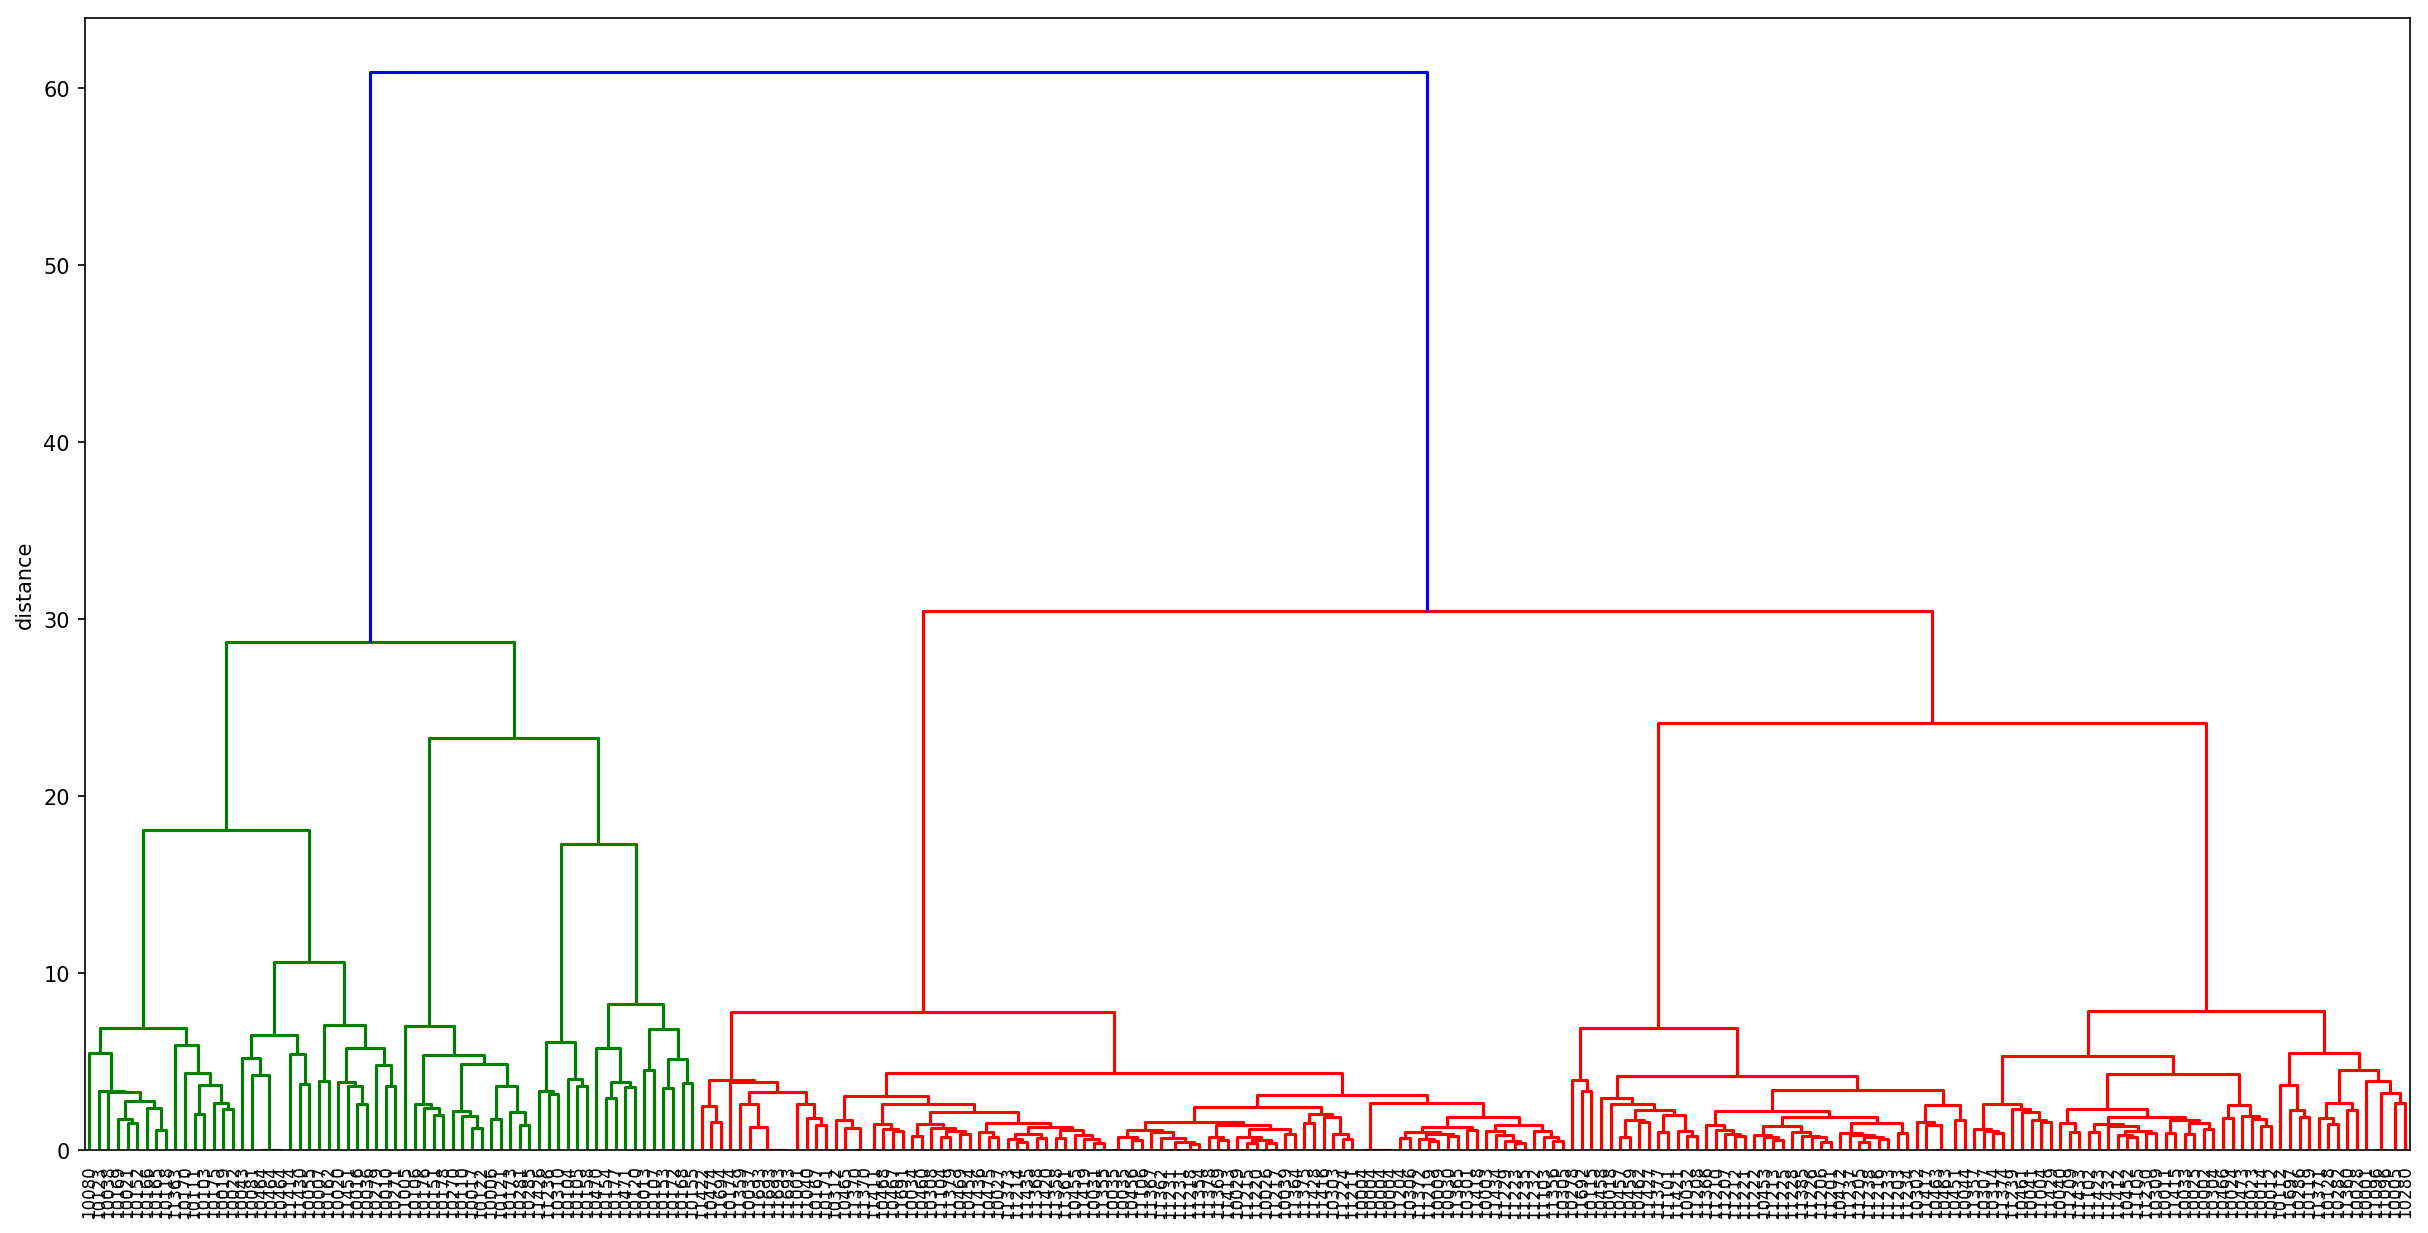

In [30]:
import scipy.cluster as scp
fig = plt.figure(figsize=(20,10), dpi=150)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = vals.index,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels
plt.show()

**Figure: Green and red routes indicate 2 clusters.**

# Compare the results of the 2 algorithms

The contour coefficient is [-1, 1]. When the contour coefficient is close to 1, the cluster is compact and the clustering is reasonable. When the contour coefficient is close to -1, the clusters disperse and need to be reclustered.

The calculation principle of the elbow is category distortion degree. If the numbers or values inside are compact to each other, the distortion degree is smaller. On the contrary, if the they are dispersed, the greater distortion degree they have.

From the result, both of algorithms get the same k-means. However,the result by Silhouette Coefficient is more intuitive.

# Interpretation

The more specific areas are on the New York border, so I suspect it is related to division of administrative areas. Of course, it requires looking up material for further verification.